In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, re, pickle

In [9]:
path_db = "./ECG_DATASET/dataset_ekg.pkl"

with open(path_db, 'rb') as f:
    data = pickle.load(f)

data_trigeminy = data["Trigeminy"]
data_nsr = data["NSR"]
data_trigeminy, data_nsr

(array([[ 0.21956848,  0.22456848,  0.21956848, ...,  0.19956848,
          0.18956848,  0.19456848],
        [-0.40543152, -0.40043152, -0.40543152, ..., -0.54543152,
         -0.54543152, -0.54543152],
        [ 0.10456848,  0.09456848,  0.08456848, ...,  0.06956848,
          0.08456848,  0.08956848],
        ...,
        [ 0.05456848,  0.05456848,  0.03956848, ...,  0.11956848,
          0.12956848,  0.12956848],
        [ 0.08956848,  0.07956848,  0.06956848, ...,  0.08956848,
          0.08956848,  0.08456848],
        [ 0.21956848,  0.21456848,  0.23456848, ...,  0.06956848,
          0.07456848,  0.06956848]], shape=(13, 3600)),
 array([[-0.06451476, -0.05951476, -0.02951476, ...,  0.13548524,
          0.13048524,  0.11548524],
        [ 0.24548524,  0.25048524,  0.24048524, ...,  0.34048524,
          0.33548524,  0.31548524],
        [ 0.13048524,  0.12548524,  0.11048524, ..., -0.20451476,
         -0.20451476, -0.20451476],
        ...,
        [-0.46451476, -0.46451476, -

In [11]:
# Function to extract features from a single ECG signal
def extract_features(signal):
    features = {
        'mean': np.mean(signal),
        'std': np.std(signal),
        'median': np.median(signal),
        'min': np.min(signal),
        'max': np.max(signal),
        'ptp': np.ptp(signal), # Peak-to-peak amplitude
        'variance': np.var(signal),
        'skewness': pd.Series(signal).skew(),
        'kurtosis': pd.Series(signal).kurtosis()
    }
    return features

# Extract features for each class
features_Trigeminy = pd.DataFrame([extract_features(signal) for signal in data_trigeminy])
features_NSR = pd.DataFrame([extract_features(signal) for signal in data_nsr])
#features_RBBBB = pd.DataFrame([extract_features(signal) for signal in data_RBBBB])

# Add a 'class' column to each DataFrame
features_Trigeminy['class'] = 'Trigeminy'
features_NSR['class'] = 'NSR'
#features_RBBBB['class'] = 'RBBBB'

# Combine the feature DataFrames
all_features = pd.concat([features_NSR, features_Trigeminy], ignore_index=True)

# Display the DataFrame containing features for all signals
#display(all_features)

In [12]:
all_features

,mean,std,median,min,max,ptp,variance,skewness,kurtosis,class
0,0.160284,0.228847,0.115485,-0.144515,1.705485,1.850,0.052371,3.593412,16.699166,NSR
1,0.270717,0.225989,0.235485,-0.494515,1.595485,2.090,0.051071,2.195015,11.268041,NSR
2,0.131302,0.266043,0.060485,-0.204515,1.845485,2.050,0.070779,3.475559,14.100811,NSR
3,-0.529288,0.337955,-0.604515,-0.959515,1.075485,2.035,0.114213,3.220420,10.432794,NSR
4,0.335085,0.299513,0.260485,0.110485,2.380485,2.270,0.089708,4.468361,22.112125,NSR
...,...,...,...,...,...,...,...,...,...,...
291,-0.574779,0.550879,-0.625432,-2.085432,2.349568,4.435,0.303467,2.220942,9.770174,Trigeminy
292,0.105152,0.395570,0.019568,-0.710432,1.844568,2.555,0.156476,1.712644,4.222185,Trigeminy
293,0.163970,0.170650,0.119568,-0.470432,1.319568,1.790,0.029121,2.950209,13.796318,Trigeminy
294,0.148818,0.174478,0.104568,-0.415432,1.294568,1.710,0.030443,3.014581,13.141379,Trigeminy


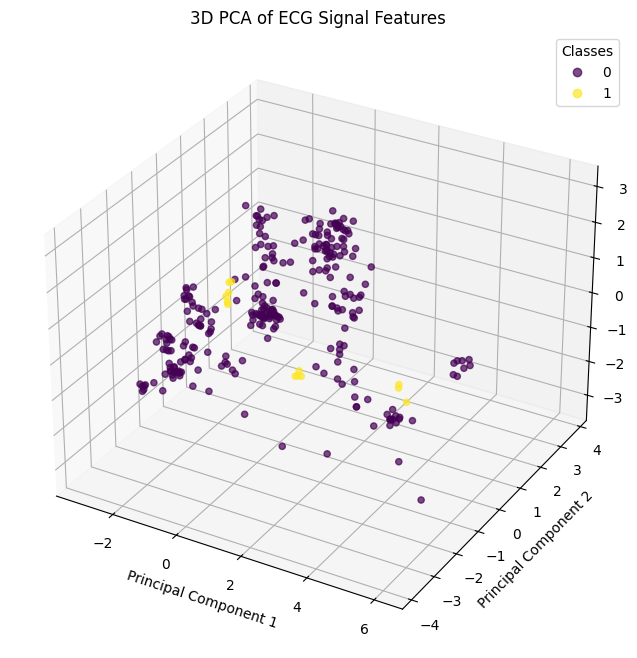

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Import for 3D plotting

# Separate features and labels from the all_features DataFrame
X = all_features.drop('class', axis=1)
y = all_features['class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA with 3 components
pca = PCA(n_components=3)

# Fit PCA on the scaled features and transform the data
X_pca = pca.fit_transform(X_scaled)

# Create a 3D scatter plot of the PCA results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d') # Create a 3D subplot

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y.astype('category').cat.codes, cmap='viridis', alpha=0.7)

# Add labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of ECG Signal Features')

# Add a legend
legend = ax.legend(*scatter.legend_elements(), title="Classes")

plt.show()

In [14]:
!pip install pywavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/4.5 MB ? eta -:--:--Downloading pywavelets-1.9.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (4.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 16.7 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 16.7 MB/s  0:00:00


In [15]:
# Install PyWavelets if not already installed
import pywt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [16]:
# Function to extract wavelet features from a single ECG signal
def extract_wavelet_features(signal, wavelet='db4', levels=5):
    """
    Extract features from DWT coefficients
    
    Args:
        signal: ECG signal
        wavelet: Wavelet type (default: 'db4' - Daubechies 4)
        levels: Number of decomposition levels
    
    Returns:
        Dictionary with wavelet features
    """
    # Perform DWT decomposition
    coeffs = pywt.wavedec(signal, wavelet, level=levels)
    
    features = {}
    
    # Extract features from approximation coefficients (cA)
    cA = coeffs[0]
    features['cA_mean'] = np.mean(cA)
    features['cA_std'] = np.std(cA)
    features['cA_energy'] = np.sum(cA**2)
    features['cA_variance'] = np.var(cA)
    features['cA_skewness'] = pd.Series(cA).skew()
    features['cA_kurtosis'] = pd.Series(cA).kurtosis()
    
    # Extract features from detail coefficients (cD)
    for i, cD in enumerate(coeffs[1:], 1):
        features[f'cD{i}_mean'] = np.mean(cD)
        features[f'cD{i}_std'] = np.std(cD)
        features[f'cD{i}_energy'] = np.sum(cD**2)
        features[f'cD{i}_variance'] = np.var(cD)
        features[f'cD{i}_skewness'] = pd.Series(cD).skew()
        features[f'cD{i}_kurtosis'] = pd.Series(cD).kurtosis()
    
    # Additional global features
    features['total_energy'] = sum(np.sum(coeff**2) for coeff in coeffs)
    features['relative_energy_cA'] = features['cA_energy'] / features['total_energy']
    
    # Relative energies for each detail level
    for i in range(1, levels + 1):
        features[f'relative_energy_cD{i}'] = features[f'cD{i}_energy'] / features['total_energy']
    
    return features

# Extract wavelet features for each class
print("Extracting wavelet features for Trigeminy signals...")
wavelet_features_trigeminy = pd.DataFrame([extract_wavelet_features(signal) for signal in data_trigeminy])

print("Extracting wavelet features for NSR signals...")
wavelet_features_nsr = pd.DataFrame([extract_wavelet_features(signal) for signal in data_nsr])

# Add class labels
wavelet_features_trigeminy['class'] = 'Trigeminy'
wavelet_features_nsr['class'] = 'NSR'

# Combine the feature DataFrames
wavelet_features_all = pd.concat([wavelet_features_nsr, wavelet_features_trigeminy], ignore_index=True)

print(f"Generated {len(wavelet_features_all)} samples with {len(wavelet_features_all.columns)-1} wavelet features")
print(f"NSR samples: {len(wavelet_features_nsr)}")
print(f"Trigeminy samples: {len(wavelet_features_trigeminy)}")

Extracting wavelet features for Trigeminy signals...
Extracting wavelet features for NSR signals...
Generated 296 samples with 43 wavelet features
NSR samples: 283
Trigeminy samples: 13


In [17]:
# Display the first few rows of the wavelet features
print("Wavelet Features Dataset:")
print(wavelet_features_all.head())
print(f"\nDataset shape: {wavelet_features_all.shape}")
print(f"Feature names: {list(wavelet_features_all.columns[:-1])}")

Wavelet Features Dataset:
    cA_mean    cA_std    cA_energy  cA_variance  cA_skewness  cA_kurtosis  \
0  0.855259  0.989376   203.529686     0.978865     1.282604     1.734975   
1  1.527909  0.558875   314.974811     0.312342     0.242207    -0.781590   
2  0.718021  1.134027   214.386937     1.286017     1.392774     1.869003   
3 -2.981441  1.283237  1253.746697     1.646697     1.471360     1.620113   
4  1.861197  1.227624   591.562496     1.507060     1.980689     3.821941   

   cD1_mean   cD1_std  cD1_energy  cD1_variance  ...  cD5_skewness  \
0 -0.022348  0.645366   49.622616      0.416497  ...     -0.010852   
1 -0.026838  0.588750   41.334275      0.346627  ...      0.894958   
2 -0.082905  0.681465   56.080787      0.464394  ...     -0.032430   
3 -0.070638  1.029971  126.833834      1.060841  ...      0.047511   
4 -0.012266  0.900989   96.619783      0.811780  ...      0.042502   

   cD5_kurtosis  total_energy  relative_energy_cA  relative_energy_cD1  \
0      0.262511 

In [18]:
# Save the wavelet features to CSV
csv_filename = "../resultados/wavelet_features_trigeminy_nsr.csv"
wavelet_features_all.to_csv(csv_filename, index=False)
print(f"Wavelet features saved to: {csv_filename}")

# Also save individual class files
wavelet_features_nsr.to_csv("../resultados/wavelet_features_nsr.csv", index=False)
wavelet_features_trigeminy.to_csv("../resultados/wavelet_features_trigeminy.csv", index=False)
print("Individual class CSV files also saved.")

Wavelet features saved to: ../resultados/wavelet_features_trigeminy_nsr.csv
Individual class CSV files also saved.


In [19]:
# PCA Analysis on Wavelet Features
print("Performing PCA analysis on wavelet features...")

# Separate features and labels
X_wavelet = wavelet_features_all.drop('class', axis=1)
y_wavelet = wavelet_features_all['class']

# Handle any NaN or infinite values
X_wavelet = X_wavelet.replace([np.inf, -np.inf], np.nan)
X_wavelet = X_wavelet.fillna(X_wavelet.mean())

# Scale the features
scaler_wavelet = StandardScaler()
X_wavelet_scaled = scaler_wavelet.fit_transform(X_wavelet)

# Apply PCA
pca_wavelet = PCA()
X_wavelet_pca = pca_wavelet.fit_transform(X_wavelet_scaled)

# Print explained variance ratio
print(f"Explained variance ratio for first 10 components:")
for i, var_ratio in enumerate(pca_wavelet.explained_variance_ratio_[:10]):
    print(f"PC{i+1}: {var_ratio:.4f} ({var_ratio*100:.2f}%)")

print(f"\nCumulative explained variance:")
cumulative_var = np.cumsum(pca_wavelet.explained_variance_ratio_)
for i in [0, 1, 2, 4, 9]:
    if i < len(cumulative_var):
        print(f"First {i+1} components: {cumulative_var[i]:.4f} ({cumulative_var[i]*100:.2f}%)")

Performing PCA analysis on wavelet features...
Explained variance ratio for first 10 components:
PC1: 0.3410 (34.10%)
PC2: 0.1499 (14.99%)
PC3: 0.0961 (9.61%)
PC4: 0.0676 (6.76%)
PC5: 0.0489 (4.89%)
PC6: 0.0445 (4.45%)
PC7: 0.0370 (3.70%)
PC8: 0.0278 (2.78%)
PC9: 0.0248 (2.48%)
PC10: 0.0238 (2.38%)

Cumulative explained variance:
First 1 components: 0.3410 (34.10%)
First 2 components: 0.4909 (49.09%)
First 3 components: 0.5870 (58.70%)
First 5 components: 0.7035 (70.35%)
First 10 components: 0.8614 (86.14%)


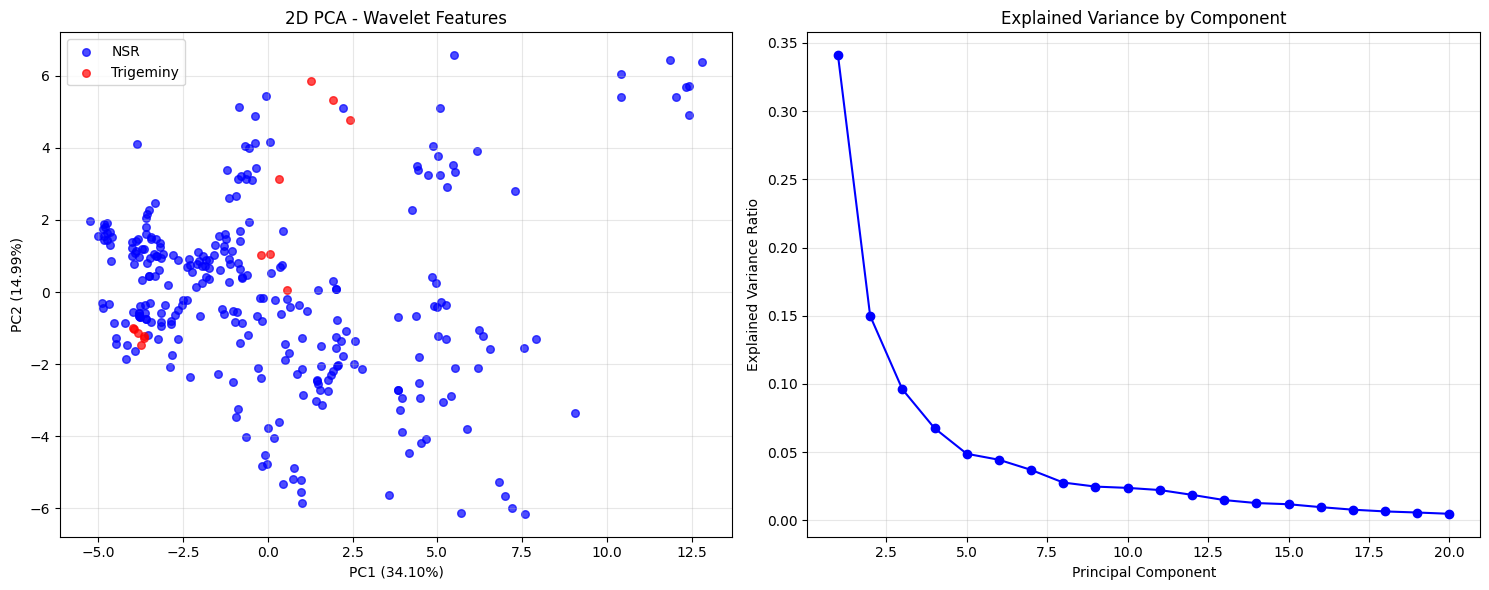

In [20]:
# Visualize PCA results - 2D plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 2D PCA plot
colors = ['blue', 'red']
classes = ['NSR', 'Trigeminy']

for i, (class_name, color) in enumerate(zip(classes, colors)):
    mask = y_wavelet == class_name
    ax1.scatter(X_wavelet_pca[mask, 0], X_wavelet_pca[mask, 1], 
               c=color, label=class_name, alpha=0.7, s=30)

ax1.set_xlabel(f'PC1 ({pca_wavelet.explained_variance_ratio_[0]*100:.2f}%)')
ax1.set_ylabel(f'PC2 ({pca_wavelet.explained_variance_ratio_[1]*100:.2f}%)')
ax1.set_title('2D PCA - Wavelet Features')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Explained variance plot
ax2.plot(range(1, min(21, len(pca_wavelet.explained_variance_ratio_)+1)), 
         pca_wavelet.explained_variance_ratio_[:20], 'bo-')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Explained Variance Ratio')
ax2.set_title('Explained Variance by Component')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

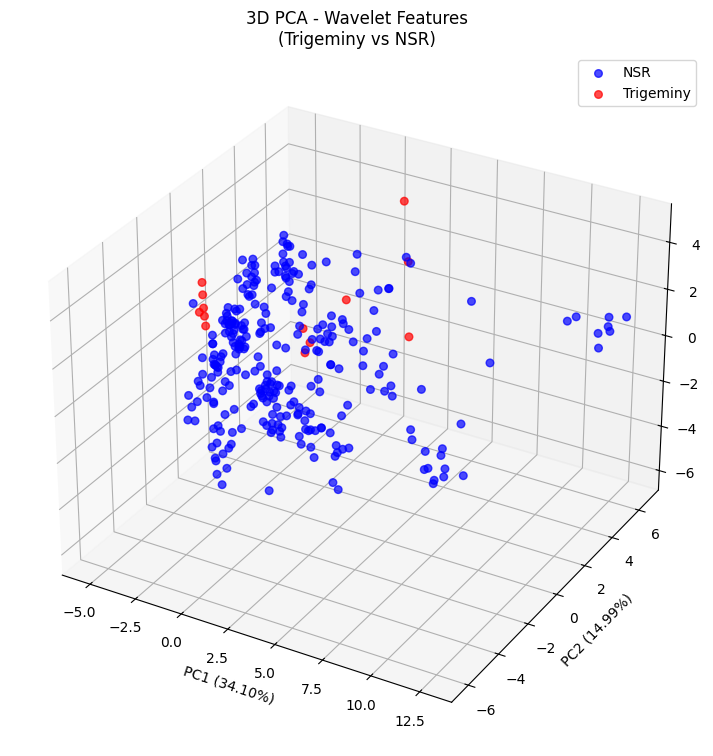

In [21]:
# 3D PCA visualization for wavelet features
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

colors = ['blue', 'red']
classes = ['NSR', 'Trigeminy']

for i, (class_name, color) in enumerate(zip(classes, colors)):
    mask = y_wavelet == class_name
    ax.scatter(X_wavelet_pca[mask, 0], X_wavelet_pca[mask, 1], X_wavelet_pca[mask, 2],
              c=color, label=class_name, alpha=0.7, s=30)

ax.set_xlabel(f'PC1 ({pca_wavelet.explained_variance_ratio_[0]*100:.2f}%)')
ax.set_ylabel(f'PC2 ({pca_wavelet.explained_variance_ratio_[1]*100:.2f}%)')
ax.set_zlabel(f'PC3 ({pca_wavelet.explained_variance_ratio_[2]*100:.2f}%)')
ax.set_title('3D PCA - Wavelet Features\n(Trigeminy vs NSR)')
ax.legend()

plt.show()

In [22]:
# Quantitative separability analysis
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

# Calculate separability metrics
def calculate_separability_metrics(X_pca, y, n_components=3):
    """Calculate various separability metrics"""
    
    # Use first n_components for analysis
    X_reduced = X_pca[:, :n_components]
    
    # Silhouette score (higher is better, range: -1 to 1)
    silhouette = silhouette_score(X_reduced, y)
    
    # Calculate class centroids
    classes = np.unique(y)
    centroids = {}
    for class_name in classes:
        mask = y == class_name
        centroids[class_name] = np.mean(X_reduced[mask], axis=0)
    
    # Inter-class distance (Euclidean distance between centroids)
    inter_class_distance = cdist([centroids[classes[0]]], [centroids[classes[1]]], 
                                metric='euclidean')[0, 0]
    
    # Intra-class variance (average within-class scatter)
    intra_class_variances = []
    for class_name in classes:
        mask = y == class_name
        class_data = X_reduced[mask]
        centroid = centroids[class_name]
        variance = np.mean(np.sum((class_data - centroid)**2, axis=1))
        intra_class_variances.append(variance)
    
    avg_intra_class_variance = np.mean(intra_class_variances)
    
    # Fisher's ratio (inter-class distance / intra-class variance)
    fisher_ratio = inter_class_distance / avg_intra_class_variance if avg_intra_class_variance > 0 else np.inf
    
    return {
        'silhouette_score': silhouette,
        'inter_class_distance': inter_class_distance,
        'avg_intra_class_variance': avg_intra_class_variance,
        'fisher_ratio': fisher_ratio,
        'centroids': centroids
    }

# Calculate metrics for wavelet features
print("=== SEPARABILITY ANALYSIS - WAVELET FEATURES ===")
wavelet_metrics = calculate_separability_metrics(X_wavelet_pca, y_wavelet, n_components=3)

print(f"Silhouette Score: {wavelet_metrics['silhouette_score']:.4f}")
print(f"Inter-class Distance: {wavelet_metrics['inter_class_distance']:.4f}")
print(f"Average Intra-class Variance: {wavelet_metrics['avg_intra_class_variance']:.4f}")
print(f"Fisher Ratio: {wavelet_metrics['fisher_ratio']:.4f}")

print(f"\nClass Centroids (first 3 PCs):")
for class_name, centroid in wavelet_metrics['centroids'].items():
    print(f"{class_name}: [{centroid[0]:.3f}, {centroid[1]:.3f}, {centroid[2]:.3f}]")

# Compare with traditional features (from earlier analysis)
print("\n=== COMPARISON WITH TRADITIONAL FEATURES ===")
traditional_metrics = calculate_separability_metrics(X_pca, y, n_components=3)

print(f"Traditional Features - Silhouette Score: {traditional_metrics['silhouette_score']:.4f}")
print(f"Traditional Features - Fisher Ratio: {traditional_metrics['fisher_ratio']:.4f}")

print(f"\nWavelet Features - Silhouette Score: {wavelet_metrics['silhouette_score']:.4f}")
print(f"Wavelet Features - Fisher Ratio: {wavelet_metrics['fisher_ratio']:.4f}")

if wavelet_metrics['silhouette_score'] > traditional_metrics['silhouette_score']:
    print("\n✅ Wavelet features show BETTER separability than traditional features!")
else:
    print("\n❌ Traditional features show better separability than wavelet features.")

=== SEPARABILITY ANALYSIS - WAVELET FEATURES ===
Silhouette Score: -0.0437
Inter-class Distance: 2.2841
Average Intra-class Variance: 20.0779
Fisher Ratio: 0.1138

Class Centroids (first 3 PCs):
NSR: [0.058, -0.050, -0.065]
Trigeminy: [-1.260, 1.084, 1.416]

=== COMPARISON WITH TRADITIONAL FEATURES ===
Traditional Features - Silhouette Score: -0.0128
Traditional Features - Fisher Ratio: 0.0986

Wavelet Features - Silhouette Score: -0.0437
Wavelet Features - Fisher Ratio: 0.1138

❌ Traditional features show better separability than wavelet features.
